## Fine Tuning Bert For Twitter Sentiment Analysis

In [1]:
import pandas as pd

In [2]:
url = "https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/twitter_multi_class_sentiment.csv"
df = pd.read_csv(url)


In [3]:
df

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger
...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,sadness
15996,i am now turning and i feel pathetic that i am...,0,sadness
15997,i feel strong and good overall,1,joy
15998,i feel like this was such a rude comment and i...,3,anger


In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        16000 non-null  object
 1   label       16000 non-null  int64 
 2   label_name  16000 non-null  object
dtypes: int64(1), object(2)
memory usage: 375.1+ KB


,0
text,0
label,0
label_name,0


In [5]:
df['label'].value_counts()

,count
label,
1,5362
0,4666
3,2159
4,1937
2,1304
5,572


## Data Analysis

In [6]:
import matplotlib.pyplot as plt

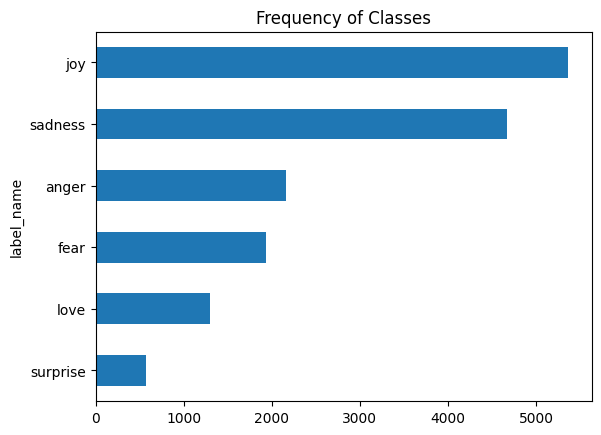

In [7]:
label_counts = df['label_name'].value_counts(ascending=True)
label_counts.plot.barh()
plt.title("Frequency of Classes")
plt.show()

In [8]:
df['Words per Tweet'] = df['text'].str.split().apply(len)
df

,text,label,label_name,Words per Tweet
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,sadness,24
15996,i am now turning and i feel pathetic that i am...,0,sadness,20
15997,i feel strong and good overall,1,joy,6
15998,i feel like this was such a rude comment and i...,3,anger,14


<Axes: title={'center': 'Words per Tweet'}, xlabel='label_name'>

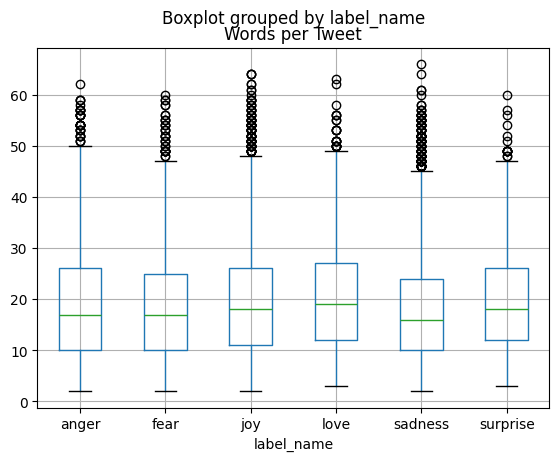

In [9]:
df.boxplot("Words per Tweet", by="label_name")

## Importing Tokenizer

In [10]:
from transformers import AutoTokenizer

model_checkpoint = "bert-base-cased"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [11]:
text = "I love machine learning!"
encoded_text=tokenizer(text)
encoded_text

{'input_ids': [101, 146, 1567, 3395, 3776, 106, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1]}

In [12]:
len(tokenizer.vocab), tokenizer.vocab_size, tokenizer.model_max_length

(28996, 28996, 512)

## Data Loader and Train Test Split

In [13]:
df

,text,label,label_name,Words per Tweet
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,sadness,24
15996,i am now turning and i feel pathetic that i am...,0,sadness,20
15997,i feel strong and good overall,1,joy,6
15998,i feel like this was such a rude comment and i...,3,anger,14


In [14]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3, random_state=42,stratify=df['label_name'])
test, validation = train_test_split(test, test_size=1/3, random_state=42,stratify=test['label_name'])

In [15]:
train.shape,test.shape,validation.shape

((11200, 4), (3200, 4), (1600, 4))

In [16]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 10.1 MB/s eta 0:00:00


In [17]:
from datasets import Dataset, DatasetDict

dataset = DatasetDict({
    "train": Dataset.from_pandas(train, preserve_index=False),
    "test": Dataset.from_pandas(test, preserve_index=False),
    "validation": Dataset.from_pandas(validation, preserve_index=False)
})

dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_name', 'Words per Tweet'],
        num_rows: 11200
    })
    test: Dataset({
        features: ['text', 'label', 'label_name', 'Words per Tweet'],
        num_rows: 3200
    })
    validation: Dataset({
        features: ['text', 'label', 'label_name', 'Words per Tweet'],
        num_rows: 1600
    })
})

## Tokenization of the Emotion/Sentiment Data

In [18]:
dataset['train'][0]

{'text': 'i feel unhappy it is no help for me that other persons say that i am happy how much truth there may be in it',
 'label': 0,
 'label_name': 'sadness',
 'Words per Tweet': 25}

In [19]:
def tokenize(batch):
  temp = tokenizer(batch['text'], padding=True, truncation=True)
  return temp

In [20]:
print(tokenize(dataset['train'][0]))

{'input_ids': [101, 178, 1631, 13143, 1122, 1110, 1185, 1494, 1111, 1143, 1115, 1168, 4983, 1474, 1115, 178, 1821, 2816, 1293, 1277, 3062, 1175, 1336, 1129, 1107, 1122, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [21]:
emotion_ecoded = dataset.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/11200 [00:00<?, ? examples/s]

Map:   0%|          | 0/3200 [00:00<?, ? examples/s]

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

In [22]:
emotion_ecoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_name', 'Words per Tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 11200
    })
    test: Dataset({
        features: ['text', 'label', 'label_name', 'Words per Tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3200
    })
    validation: Dataset({
        features: ['text', 'label', 'label_name', 'Words per Tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1600
    })
})

In [66]:
label2id = {x['label_name']: x['label'] for x in dataset['train']}
id2label = {v: k for k, v in label2id.items()}

label2id,id2label

({'sadness': 0, 'joy': 1, 'fear': 4, 'surprise': 5, 'anger': 3, 'love': 2},
 {0: 'sadness', 1: 'joy', 4: 'fear', 5: 'surprise', 3: 'anger', 2: 'love'})

## Model Building

In [24]:
from transformers import AutoModel
import torch

In [25]:
model = AutoModel.from_pretrained(model_checkpoint)

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

In [26]:
model.config

BertConfig {
  "_attn_implementation_autoset": true,
  "_name_or_path": "bert-base-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.48.3",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}

In [27]:
from transformers import AutoModelForSequenceClassification, AutoConfig

num_labels = len(label2id)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

config = AutoConfig.from_pretrained(model_checkpoint, num_labels=num_labels, id2label=id2label, label2id=label2id)
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, config=config).to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [44]:
import os
os.environ["WANDB_DISABLED"] = "true"

In [46]:
from transformers import TrainingArguments

batch_size = 64
training_dir = "bert_base_train_dir"

training_args = TrainingArguments(
    output_dir=training_dir,
    overwrite_output_dir=True,
    num_train_epochs=2,
    learning_rate=2e-4,
    per_device_train_batch_size=batch_size,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    disable_tqdm=False)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [30]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.5 MB/s eta 0:00:00


In [49]:
import evaluate
import numpy as np

accuracy = evaluate.load("accuracy")

def compute_metrics_evaluate(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=-1)
    return accuracy.compute(predictions=predictions, references=labels)

In [50]:
# use sklearn to build compute metrics
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [43]:
!pip install wandb

In [51]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emotion_ecoded['train'],
                  eval_dataset = emotion_ecoded['validation'],
                  tokenizer=tokenizer)

<ipython-input-51-db984782599e>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model, args=training_args,


In [52]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.195465,0.915625,0.916651
2,No log,0.171586,0.925625,0.926615


TrainOutput(global_step=350, training_loss=0.23398590087890625, metrics={'train_runtime': 361.0524, 'train_samples_per_second': 62.041, 'train_steps_per_second': 0.969, 'total_flos': 1082083076121600.0, 'train_loss': 0.23398590087890625, 'epoch': 2.0})

## Model Evaluation

In [54]:
preds_output = trainer.predict(emotion_ecoded['test'])
preds_output.metrics

{'test_loss': 0.17199459671974182,
 'test_accuracy': 0.928125,
 'test_f1': 0.928707102962056,
 'test_runtime': 15.1032,
 'test_samples_per_second': 211.875,
 'test_steps_per_second': 26.484}

In [58]:
y_pred = np.argmax(preds_output.predictions, axis=1)
y_true = emotion_ecoded['test'][:]['label']

In [60]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       933
           1       0.96      0.92      0.94      1072
           2       0.79      0.90      0.84       261
           3       0.96      0.91      0.93       432
           4       0.86      0.91      0.89       387
           5       0.81      0.77      0.79       115

    accuracy                           0.93      3200
   macro avg       0.89      0.90      0.89      3200
weighted avg       0.93      0.93      0.93      3200



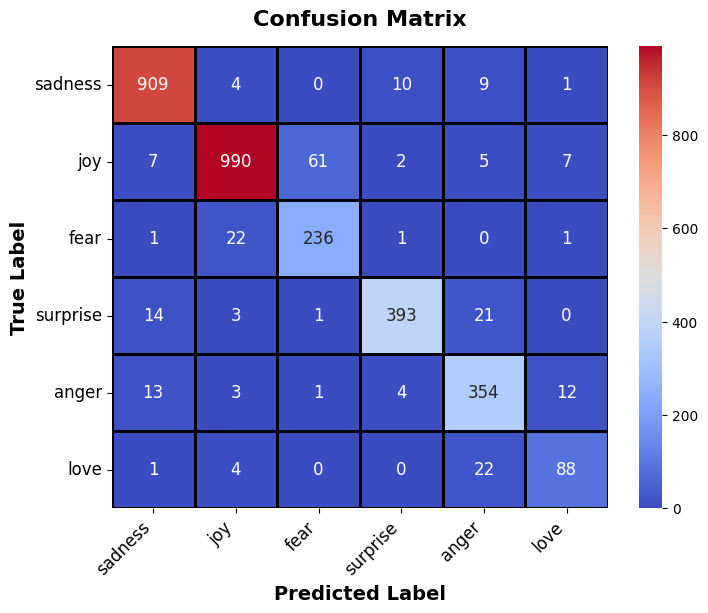

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Compute Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
labels = list(label2id.keys())

# Create figure
plt.figure(figsize=(8, 6))

cmap = "coolwarm"

# Plot Heatmap
ax = sns.heatmap(cm, annot=True, fmt='g', cmap=cmap, xticklabels=labels, yticklabels=labels,
                 linewidths=1, linecolor='black', cbar=True, annot_kws={"size": 12})

# Improve readability
ax.set_xlabel("Predicted Label", fontsize=14, fontweight="bold")
ax.set_ylabel("True Label", fontsize=14, fontweight="bold")
ax.set_title("Confusion Matrix", fontsize=16, fontweight="bold", pad=15)

# Rotate x-axis labels for clarity
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Adjust the aspect ratio
plt.gca().set_aspect("auto")

# Show the plot
plt.show()


## Build Prediction Function and Save Model

In [76]:
text = "I am super happy today. I got it done. Finally!"

In [77]:
def get_prediction(text):
  input_encoded = tokenizer(text, return_tensors="pt").to(device)
  output = model(**input_encoded)
  logits = output.logits
  pred = torch.argmax(logits, dim=-1).item()
  return id2label[pred]

In [78]:
get_prediction(text)

'joy'

In [79]:
trainer.save_model("bert-sentiment-model")

In [83]:
tokenizer.save_pretrained("fine_tuned_model")

('fine_tuned_model/tokenizer_config.json',
 'fine_tuned_model/special_tokens_map.json',
 'fine_tuned_model/vocab.txt',
 'fine_tuned_model/added_tokens.json',
 'fine_tuned_model/tokenizer.json')

In [82]:
# use pipeline for prediction
from transformers import pipeline

classifier = pipeline("text-classification", model="bert-sentiment-model")
classifier([text,"Hello, how are you!"])

Device set to use cuda:0


[{'label': 'joy', 'score': 0.9964549541473389},
 {'label': 'joy', 'score': 0.9826803803443909}]

In [84]:
!zip -r bert-sentiment-model.zip bert-sentiment-model


  adding: bert-sentiment-model/ (stored 0%)
  adding: bert-sentiment-model/config.json (deflated 52%)
  adding: bert-sentiment-model/training_args.bin (deflated 51%)
  adding: bert-sentiment-model/model.safetensors (deflated 7%)
  adding: bert-sentiment-model/tokenizer_config.json (deflated 75%)
  adding: bert-sentiment-model/vocab.txt (deflated 49%)
  adding: bert-sentiment-model/special_tokens_map.json (deflated 42%)
  adding: bert-sentiment-model/tokenizer.json (deflated 70%)


In [86]:
model.save_pretrained("bert-base-sentiment-model")
tokenizer.save_pretrained("bert-base-sentiment-model")


('bert-base-sentiment-model/tokenizer_config.json',
 'bert-base-sentiment-model/special_tokens_map.json',
 'bert-base-sentiment-model/vocab.txt',
 'bert-base-sentiment-model/added_tokens.json',
 'bert-base-sentiment-model/tokenizer.json')

In [87]:
!zip -r bert-base-sentiment-model.zip bert-base-sentiment-model


  adding: bert-base-sentiment-model/ (stored 0%)
  adding: bert-base-sentiment-model/config.json (deflated 52%)
  adding: bert-base-sentiment-model/model.safetensors (deflated 7%)
  adding: bert-base-sentiment-model/tokenizer_config.json (deflated 75%)
  adding: bert-base-sentiment-model/vocab.txt (deflated 49%)
  adding: bert-base-sentiment-model/special_tokens_map.json (deflated 42%)
  adding: bert-base-sentiment-model/tokenizer.json (deflated 70%)
